In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
graphipy = GraphiPy()

In [3]:
# The twitter API needs these credentials
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
ACCESS_TOKEN = ""
TOKEN_SECRET = ""
twitter_api_credentials = {
    "consumer_key": CONSUMER_KEY,
    "consumer_secret": CONSUMER_SECRET,
    "access_token": ACCESS_TOKEN,
    "token_secret": TOKEN_SECRET
}

In [4]:
twitter = graphipy.get_twitter(twitter_api_credentials)

# Search tweets by keyword

In [5]:
keyword = "python"
limit = 5
# call fetch_tweets_by_topic(graph, keyword, limit=15), which will return a graph containing: 
# nodes of tweets, nodes of creators, nodes of original tweet if the tweet returned retweet/quote another tweet
# edges between tweet and creator, tweet and tweet(retweet/quote relationship)
tweets_graph = twitter.fetch_tweets_by_topic(graphipy.create_graph(), keyword, 5)

In [6]:
# we can get a pandas data frame for tweets
tweets_df = tweets_graph.get_df("tweet")
tweets_df.head()

,_id,Label,label_attribute,created_at,text,source,truncated,is_quote_status,retweet_count,favorite_count,lang,hashtags,urls,media,user_mentions
0,1062585376047542272,tweet_1062585376047542272,tweet,Wed Nov 14 05:57:50 +0000 2018,Yayyy!!! Come join us python lovers! 💞🐍 I’m ta...,"<a href=""http://twitter.com/download/iphone"" r...",True,True,0,0,en,[],[https://t.co/Rk0eD5SNCF],{},[]
1,1062583853598920704,tweet_1062583853598920704,tweet,Wed Nov 14 05:51:47 +0000 2018,@DigitalEmpress I took an intro to python a co...,"<a href=""http://twitter.com/download/android"" ...",True,False,0,1,en,[],[https://t.co/dpZtdRogTM],{},[DigitalEmpress]
2,1062585270221070336,tweet_1062585270221070336,tweet,Wed Nov 14 05:57:24 +0000 2018,RT @tomsvalentine: i never thought i’d be able...,"<a href=""http://twitter.com/download/iphone"" r...",False,False,17607,0,en,[],[],{'photo': 'https://t.co/oN5WqhKVJg'},[tomsvalentine]
3,1062109597794746368,tweet_1062109597794746368,tweet,Mon Nov 12 22:27:15 +0000 2018,i never thought i’d be able to say i relate to...,"<a href=""http://twitter.com/download/iphone"" r...",False,False,17607,35085,en,[],[],{'photo': 'https://t.co/oN5WqhKVJg'},[]
4,1062585269293969409,tweet_1062585269293969409,tweet,Wed Nov 14 05:57:24 +0000 2018,RT @Conservative_VW: BREAKING NEWS ...\n\nMan ...,"<a href=""http://twitter.com/download/iphone"" r...",False,False,116,0,en,[],[],{},[Conservative_VW]


In [7]:
# for each tweet, we can get general information:
tweets_df.iloc[0]

_id                                              1062585376047542272
Label                                      tweet_1062585376047542272
label_attribute                                                tweet
created_at                            Wed Nov 14 05:57:50 +0000 2018
text               Yayyy!!! Come join us python lovers! 💞🐍 I’m ta...
source             <a href="http://twitter.com/download/iphone" r...
truncated                                                       True
is_quote_status                                                 True
retweet_count                                                      0
favorite_count                                                     0
lang                                                              en
hashtags                                                          []
urls                                       [https://t.co/Rk0eD5SNCF]
media                                                             {}
user_mentions                     

In [8]:
# we can get a pandas dataframe for creators of each tweet at the same time
creators_df = tweets_graph.get_df("user")
creators_df.head()

,name,_id,Label,label_attribute,screen_name,location,url,description,protected,verified,...,favourites_count,statuses_count,created_at,geo_enabled,lang,profile_background_color,profile_background_image_url,profile_image_url,profile_link_color,profile_text_color
0,♕,855532824945979393,♕,user,DigitalEmpress,Baton Rouge 🛫 DMV,https://t.co/GFHx5GPMXJ,life-sized bratz doll with a passion for hacki...,False,False,...,80520,67814,Fri Apr 21 21:24:55 +0000 2017,True,en,000000,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1062462399...,F58EA8,000000
1,MOST DOPE FOREVER🏳️‍🌈™,2910302304,MOST DOPE FOREVER🏳️‍🌈™,user,dmonty_python,"Texas, USA",None,"A bi who loves music, wrestling & anime|♉️|#PV...",False,False,...,205257,82044,Tue Nov 25 21:25:15 +0000 2014,False,en,000000,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1047991631...,FA743E,000000
2,PCH,822649191650521089,PCH,user,patriciocaca,"San Diego, CA",None,I live in the greatest nation on the planet. #...,False,False,...,3169,3982,Sat Jan 21 03:37:06 +0000 2017,False,en,F5F8FA,None,http://pbs.twimg.com/profile_images/9729169870...,1DA1F2,333333
3,Mel Frequency,449443454,Mel Frequency,user,yoyoy15,,None,広大工二 サイクリング部 Colts/阪神,False,False,...,591,1792,Thu Dec 29 03:51:26 +0000 2011,False,ja,000000,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/3788000000...,979797,333333
4,Anthony N Carrillo,3005048243,Anthony N Carrillo,user,ANCarrillo964,🇻🇦🇺🇸🇪🇪🇨🇦🇲🇽🇨🇭,https://t.co/JnYqEHAyam,I'm an International explorer 🗺️ who plans on ...,False,False,...,3935,19533,Fri Jan 30 06:11:10 +0000 2015,False,en,000000,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5610453368...,3B94D9,000000


In [9]:
# We can display screen name of creators
creators_df.screen_name

0    DigitalEmpress
1     dmonty_python
2      patriciocaca
3           yoyoy15
4     ANCarrillo964
Name: screen_name, dtype: object

# Get one user's followers by screen name

In [10]:
screenname = "ANCarrillo964"
followers_limit = 10
# call fecth_followers_by_screenname(graph, screenname, limit=15), which will return a graph containing:
# node of user itself and nodes of followers
# edges between user and its followers
followers_graph = twitter.fecth_followers_by_screenname(graphipy.create_graph(), screenname, followers_limit)

In [11]:
# we can get list of nodes
nodes = followers_graph.get_nodes()
# we can print type of nodes:
print(nodes.keys())

dict_keys(['user'])


In [12]:
# we get list of nodes includes a user node and three followers nodes
nodes["user"].head()

,name,_id,Label,label_attribute,screen_name,location,url,description,protected,verified,...,favourites_count,statuses_count,created_at,geo_enabled,lang,profile_background_color,profile_background_image_url,profile_image_url,profile_link_color,profile_text_color
0,Anthony N Carrillo,3005048243,Anthony N Carrillo,user,ANCarrillo964,🇻🇦🇺🇸🇪🇪🇨🇦🇲🇽🇨🇭,https://t.co/JnYqEHAyam,I'm an International explorer 🗺️ who plans on ...,False,False,...,3935,19533,Fri Jan 30 06:11:10 +0000 2015,False,en,000000,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5610453368...,3B94D9,000000
1,comatosed,111366242,comatosed,user,Comatose_D,Game Grid,http://t.co/y5GXG9VR07,Geekin' out and spinin' tunes.,False,False,...,17836,22988,Thu Feb 04 17:32:51 +0000 2010,False,en,131516,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/8439332309...,009999,333333
2,Hernandez Potenciano,1057583318269640704,Hernandez Potenciano,user,HernandezPoten1,,None,,False,False,...,1,0,Wed Oct 31 10:41:26 +0000 2018,False,en,F5F8FA,None,http://pbs.twimg.com/profile_images/1057662400...,1DA1F2,333333
3,Superdigital,1671838609,Superdigital,user,getsuperdigital,"Boston, MA",https://t.co/826nX5DFHF,Full-service agency specializing in digital co...,False,False,...,6,226,Thu Aug 15 00:55:12 +0000 2013,False,en,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1009118586...,ABB8C2,333333
4,John Bould,980305417870835712,John Bould,user,JohnBould1,Global,https://t.co/wyl8KaWA7s,Global Finance Executive (CFO) | Finance Trans...,False,False,...,206,157,Sun Apr 01 04:46:39 +0000 2018,False,en,F5F8FA,None,http://pbs.twimg.com/profile_images/1047491083...,1DA1F2,333333


In [13]:
# we can also get a list of edges
edges = followers_graph.get_edges()
# we can print type of edges:
print(edges.keys())

dict_keys(['follow', 'followed by'])


In [14]:
# we get list of edges between user node and follower nodes: follower -> user
edges["followed by"].head()

,Source,Target,Label,label_attribute,_id
0,3005048243,111366242,FOLLOWED BY,FOLLOWED BY,3005048243111366242FOLLOWED BY
1,3005048243,1057583318269640704,FOLLOWED BY,FOLLOWED BY,30050482431057583318269640704FOLLOWED BY
2,3005048243,1671838609,FOLLOWED BY,FOLLOWED BY,30050482431671838609FOLLOWED BY
3,3005048243,980305417870835712,FOLLOWED BY,FOLLOWED BY,3005048243980305417870835712FOLLOWED BY
4,3005048243,818921856451411968,FOLLOWED BY,FOLLOWED BY,3005048243818921856451411968FOLLOWED BY


# Get one user's friends by screen name

In [15]:
# we can also call fecth_friends_by_screenname(graph, screenname, limit=15), which will return a graph containing:
# node of user itself and nodes of followers
# edges between user and its friends
friends_limit = 3
friends_graph = twitter.fecth_friends_by_screenname(graphipy.create_graph(), screenname, friends_limit)

# Get single user's information by screen name

In [16]:
# We can also call fetch_user_by_screenname(self, graph, screenname), which will return a graph containig a user node:
single_user_graph = twitter.fetch_user_by_screenname(graphipy.create_graph(), screenname)

# Get single tweet's information by tweet id

In [17]:
# We can also call fetch_tweet_by_id(self, graph, id), which will return a graph containig a tweet node:
id = 1062582551611490304
single_tweet_graph = twitter.fetch_tweet_by_id(graphipy.create_graph(), id)

# Export a graph to CSV file

In [18]:
# We can call export_all_CSV() on the graph desired
# then graph can be showed via gephi, cytoscape, etc. takes CSV files
tweets_graph.export_all_CSV("tweets_searched_by_Python")

In [19]:
# We cam also specify we want to export by calling export_CSV()
csv_name = "tweets_searched_by_Python_partial"
nodes = {"user"}
edges = {"created by", "create"}
tweets_graph.export_CSV(csv_name, nodes, edges)

# Visualization with NetworkX

In [20]:
%matplotlib inline

# We will visualize followers_graph
followers_graph_nodes = followers_graph.get_nodes()
followers_graph_edges = followers_graph.get_edges()

In [21]:
# Create the graph using graphipy
nx_graph = graphipy.nx_create_from_pd(nodes_df=followers_graph_nodes, edges_df=followers_graph_edges)

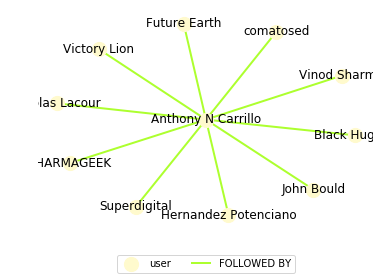

In [22]:
# Draw the graph using graphipy
options = {
    "node_label": "Label",
    "colorful_edges": True
}
legend = graphipy.nx_draw_random(nx_graph, options=options, legend=True)